# VISUALIZATION LAB - Continuation of the EuroLeague Case Study
## Let's compare the competitions!

![](https://eurospects.com/wp-content/uploads/2018/10/eurocupeuroleague.png)

First of all, we must 

- Import the actual.csv Dataset. This dataset will be the CSV of the result obtained in class.
- Import ec23.xlsx. This dataset correspond to the import the dataset corresponding to Eurocup. Don't worry, this time the Excel will be cleaned (almost)


In [181]:

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [182]:
elteams=pd.read_csv("datasets/actual.csv")
ecteams=pd.read_excel("datasets/ec2023.xlsx", index_col=False)

In [183]:
import warnings
warnings.filterwarnings("ignore")

In [184]:
ecteams.fecha=pd.to_datetime(ecteams.fecha)
ecteams["Dia"] = ecteams["fecha"].dt.strftime('%Y-%m-%d')
ecteams["Hora"] = ecteams["fecha"].dt.strftime('%H:%M:%S')
ecteams.drop(columns = ["fecha"], inplace=True)

In [185]:
ecteams.drop_duplicates()

,Unnamed: 0,ronda,local,visitante,localscore,roadscore,Winner,Ganador,plusminus,Dia,Hora
0,0,17,Dreamland Gran Canaria,U-BT Cluj-Napoca,111,113.0,Visitante,113.0,-2.0,2024-01-31,21:00:00
1,1,17,Dolomiti Energia Trento,Buducnost VOLI Podgorica,78,97.0,Visitante,97.0,-19.0,2024-01-31,20:00:00
2,2,17,ratiopharm Ulm,Aris Midea Thessaloniki,66,86.0,Visitante,86.0,-20.0,2024-01-31,19:30:00
3,3,17,Cedevita Olimpija Ljubljana,London Lions,85,92.0,Visitante,92.0,-7.0,2024-01-31,18:30:00
4,4,17,Turk Telekom Ankara,Mincidelice JL Bourg en Bresse,64,68.0,Visitante,68.0,-4.0,2024-01-31,18:00:00
...,...,...,...,...,...,...,...,...,...,...,...
168,165,1,U-BT Cluj-Napoca,Turk Telekom Ankara,80,71.0,Local,80.0,9.0,2023-10-04,18:00:00
169,166,1,Prometey Slobozhanske,Veolia Towers Hamburg,97,77.0,Local,97.0,20.0,2023-10-04,18:00:00
170,167,1,Paris Basketball,Wolves Vilnius,105,78.0,Local,105.0,27.0,2023-10-03,20:30:00
171,168,1,ratiopharm Ulm,Dolomiti Energia Trento,80,70.0,Local,80.0,10.0,2023-10-03,19:30:00


In [186]:
ecteams["Competition"]="Eurocup"

In [187]:
ecteams.drop(columns = ["Ganador"], inplace=True)

In [188]:
ecteams.Winner.value_counts() 

Winner
Local        91
Visitante    82
Name: count, dtype: int64

In [189]:
ecteams.rename(columns={"Winner":"Ganador"}, inplace=True)

In [190]:
ecteams.columns = ecteams.columns.str.capitalize()

In [191]:
comp_el=elteams[["Competition", "Localscore", "Roadscore", "Plusminus", "Ganador"]]
comp_ec=ecteams[["Competition", "Localscore", "Roadscore", "Plusminus", "Ganador"]]

In [192]:
competition=pd.concat([comp_el, comp_ec], axis=0, ignore_index=True)

Based on the last lab, you should  have the combination of both competitions in the same dataframe. 

Is time for the questions you must answer... Graphically!

1. How many matches have been in each competition?
2. What are the maximum points that a local team has scored per competition? And the road team as well. 
3. Do the same operations with the average points (per competition)
4. Can you tell me the maximum difference that has been in a match, splitted by competition? 
    - Careful: The Plusminus is both positive and negative, being negative that the Road Team has achieved the Victory. To have the absolute, create a new Column named Absolut_Plusminus. Remember: np.where is life!
5. Also grouped by competition, give me the number of victories of the Locals and the Visitors

In [193]:
# 1 How many matches have been in each competition?
competition.groupby(by=["Competition"]).agg({"Localscore":"count"})

,Localscore
Competition,
Eurocup,173
Euroleague,225


In [194]:
# 2 What are the maximum points that a local team has scored per competition? And the road team as well.
competition.groupby(by=["Competition"]).agg({"Localscore":"max","Roadscore":"max"})


,Localscore,Roadscore
Competition,,
Eurocup,120,114.0
Euroleague,130,126.0


In [195]:
# 3 Do the same operations with the average points (per competition)


In [196]:
competition.groupby(by=["Competition"]).agg({"Localscore":"mean","Roadscore":"mean"})

,Localscore,Roadscore
Competition,,
Eurocup,85.150289,83.936047
Euroleague,83.284444,79.173333


In [197]:
# 4 Can you tell me the maximum difference that has been in a match, splitted by competition?
competition["Absolut_Plusminus"]=competition.Plusminus.abs()
competition.head()

,Competition,Localscore,Roadscore,Plusminus,Ganador,Absolut_Plusminus
0,Euroleague,94,73.0,21.0,Local,21.0
1,Euroleague,96,81.0,15.0,Local,15.0
2,Euroleague,79,82.0,-3.0,Visitante,3.0
3,Euroleague,80,68.0,12.0,Local,12.0
4,Euroleague,91,74.0,17.0,Local,17.0


In [198]:
competition.groupby(by=["Competition"]).agg({"Absolut_Plusminus":"max"})

,Absolut_Plusminus
Competition,
Eurocup,39.0
Euroleague,39.0


In [199]:
# 5 Also grouped by competition, give me the number of victories of the Locals and the Visitors
competition[["Competition", "Ganador"]].groupby("Ganador").value_counts()

Ganador    Competition
Local      Euroleague     150
           Eurocup         91
Visitante  Eurocup         82
           Euroleague      75
Name: count, dtype: int64

# More Graphs!

Create one of each of the following graph types, with variables of your choice, and add at least two comments describing something interesting of each graph:

1. Comparison Charts (Barplot, Scatterplot or Countplot)
2. Histogram
3. Stack columns Chart
4. Correlation Matrix/Heatmap
5. Trends (Line Charts)

In [200]:
competition.sample()

,Competition,Localscore,Roadscore,Plusminus,Ganador,Absolut_Plusminus
380,Eurocup,67,70.0,-3.0,Visitante,3.0


In [201]:
competition.groupby(by=["Competition"]).agg({"Localscore":"count"})
#matches per type of competition

,Localscore
Competition,
Eurocup,173
Euroleague,225


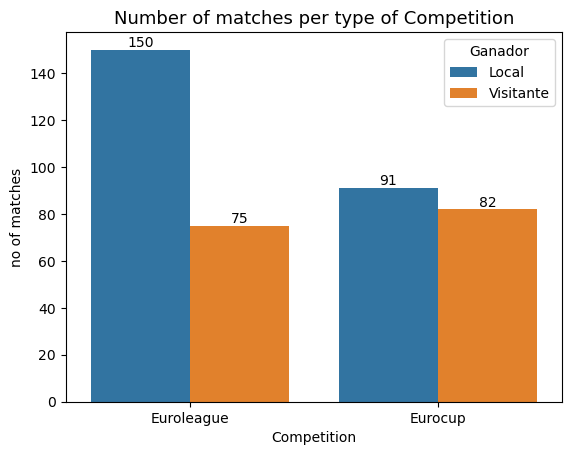

In [202]:
# Comparison Chart
y=sns.countplot(data=competition, x="Competition",hue=competition["Ganador"], palette="tab10")
plt.ylabel("no of matches")
plt.title("Number of matches per type of Competition", size=13)

for i in y.containers:
    y.bar_label(i,);

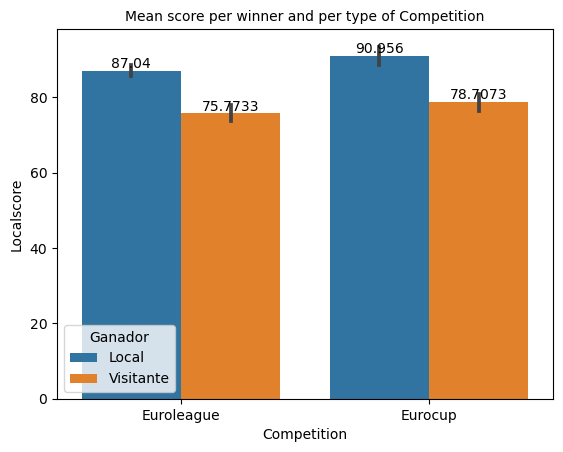

In [214]:

barplot = sns.barplot(x="Competition", y="Localscore", hue="Ganador",data=competition)
plt.title("Mean score per winner and per type of Competition", size=10)

for i in barplot.containers:
    barplot.bar_label(i,);

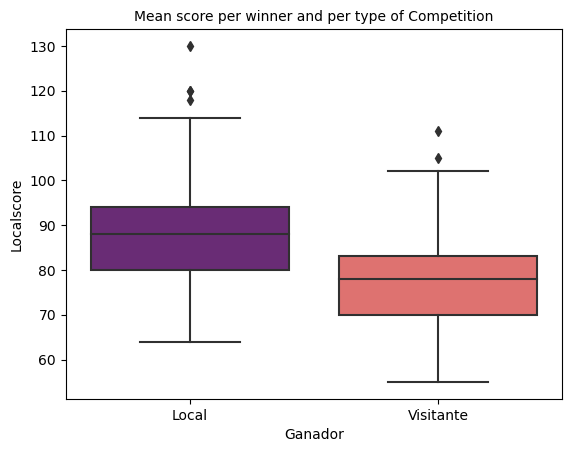

In [215]:
sns.boxplot(x=competition["Ganador"], y=competition["Localscore"], palette="magma")
plt.title("Mean score per winner and per type of Competition", size=10);

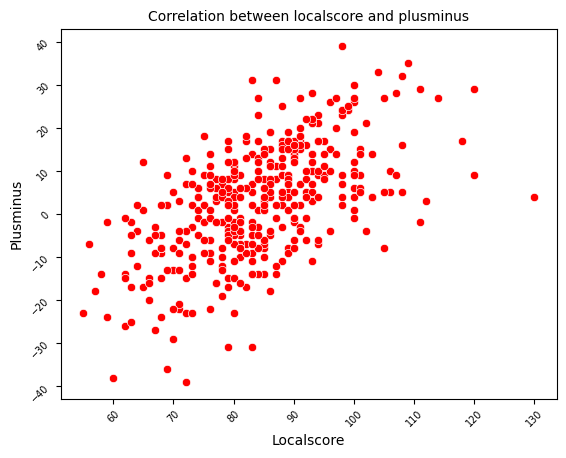

In [217]:
x=sns.scatterplot(x=competition["Localscore"], y=competition["Plusminus"],color="red")
x.set_xticklabels(x.get_xticklabels(), rotation=45, size=7, )
x.set_yticklabels(x.get_yticklabels(), rotation=45, size=7)
plt.title("Correlation between localscore and plusminus", size=10);

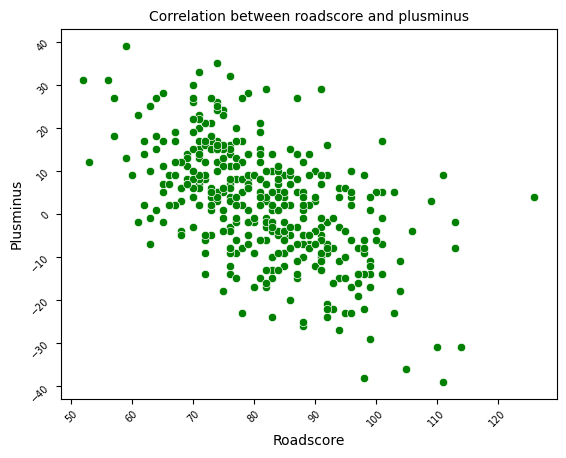

In [219]:
y=sns.scatterplot(x=competition["Roadscore"], y=competition["Plusminus"], color="green")
y.set_xticklabels(y.get_xticklabels(), rotation=45, size=7)
y.set_yticklabels(y.get_yticklabels(), rotation=45, size=7)
plt.title("Correlation between roadscore and plusminus", size=10);

**Your comments here**
- Euroleague had 225 matches and Eurocup 173 matches. In both competitions the local team won more matches than the other team (150 vs. 75 and 91 vs. 82) so this conclusion is stronger when we are talking about the Euroleague (maybe a referee's bias?). We are counting matches and comparing competitions,so a barplot is a good option to graph this info. Besides, the bar labels help to see the info more quickly and detailed.
  
- The boxplot shows the number of points earned by the local and visitor teams for both competitions. Local team has a score around 80-95 and visitor around 70-85 (median is around 90 for the local team and 89 points for the visitor). The confidence intervals (whiskers) are similar for both teams (showing there is aprox. the same variability in the data, this is data is deviated from the centre around +- 15-20 points in each case). There is an outlier in the local team where the score was 130 (here we could remove the data or try to fix it).
  
- Looking at the scatterplots, there is a positive relationship between the plusminus value and the local score. The bigger the local score is, the bigger the plusminus value is (and the opposite, when the value of local score decreases, so does the value of the plusminus variable). However, there is a negative relationship between the plusminus and the roadscore. This means that the bigger the roadscore, the smaller the plusminus (and vice versa). It makes sense, as the plusminus is calculated as the localscore - the roadscore

In [206]:
competition.sample()

,Competition,Localscore,Roadscore,Plusminus,Ganador,Absolut_Plusminus
69,Euroleague,73,71.0,2.0,Local,2.0


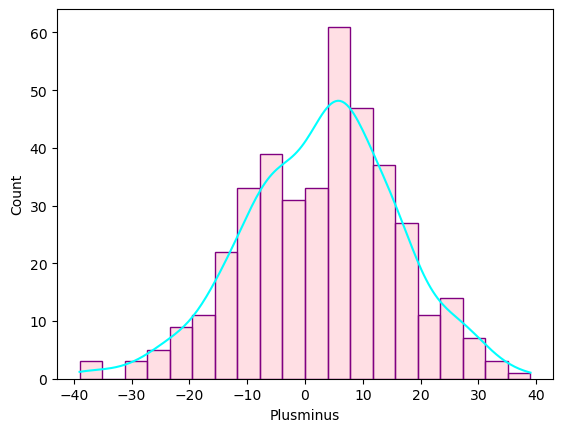

In [207]:
# Histogram
a=sns.histplot(x=competition.Plusminus.dropna(), bins=20, color="pink", edgecolor="purple", kde="True")
a.lines[0].set_color("cyan");


**Your comments here**
- The histogram shows the values of the Plusminus variable. The most common value (mode) is around 7. We can see it has a normal distribution (approx.) with values ranging between -40 and 40. Center (mean) is around 5.
- when we talk about an analysis by competition, we can see the the Euroleague has less variabilty (values are less far from the center in both directions) with respect to the Eurocup p

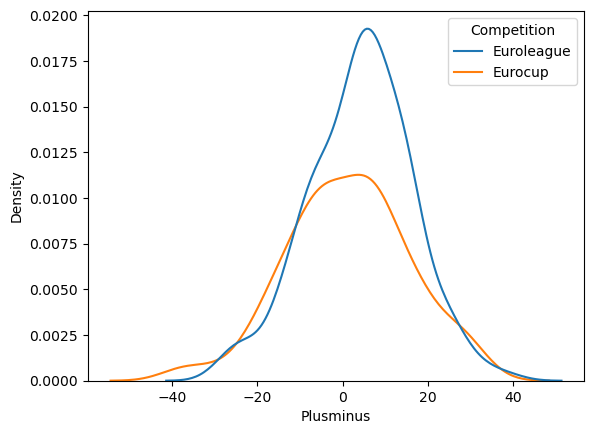

In [208]:
sns.kdeplot(x=competition.Plusminus, hue=competition.Competition);



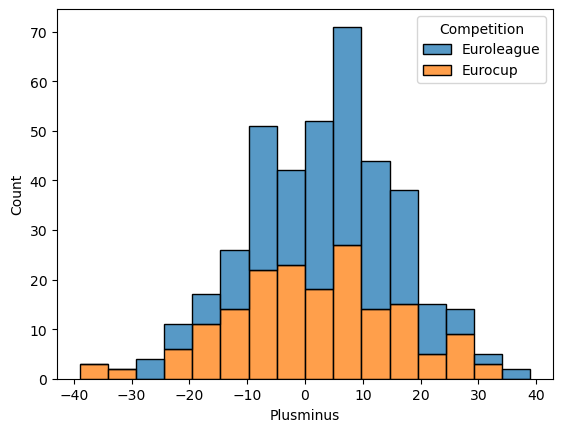

In [209]:
# Stacked columns

sns.histplot(data=competition, x="Plusminus", hue="Competition", multiple="stack");
#con "multiple=stack" genera gráficos acumulados

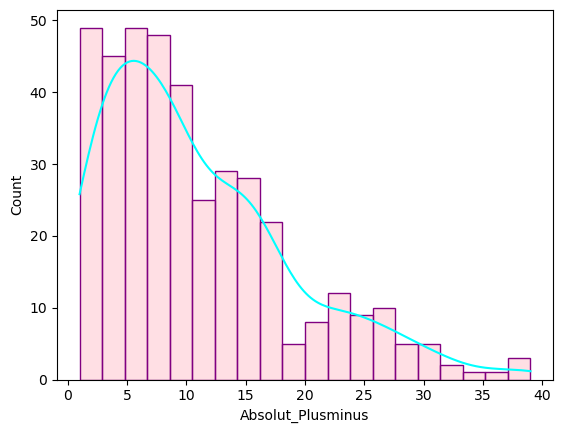

In [210]:
#however, here we can't see very properly so we need the absolut plusminus:

a=sns.histplot(x=competition.Absolut_Plusminus.dropna(), bins=20, color="pink", edgecolor="purple", kde="True")
a.lines[0].set_color("cyan");


**Your comments here**
- the absolut plusminus shows a completely different graph. It is skewed to the right, what means the values more repetead are the smallest ones. So, the difference between the scores of local and visitor are small in general and only a few of them show a big difference. 
- Here, the mean is skewed to the left and so does the mode while the median is more centered. In this cases, the median is a better way to measure the centre than the mean. 

In [162]:
competition.sample()


,Competition,Localscore,Roadscore,Plusminus,Ganador,Absolut_Plusminus
71,Euroleague,94,85.0,9.0,Local,9.0


In [163]:
competition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Competition        398 non-null    object 
 1   Localscore         398 non-null    int64  
 2   Roadscore          397 non-null    float64
 3   Plusminus          397 non-null    float64
 4   Ganador            398 non-null    object 
 5   Absolut_Plusminus  397 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 18.8+ KB


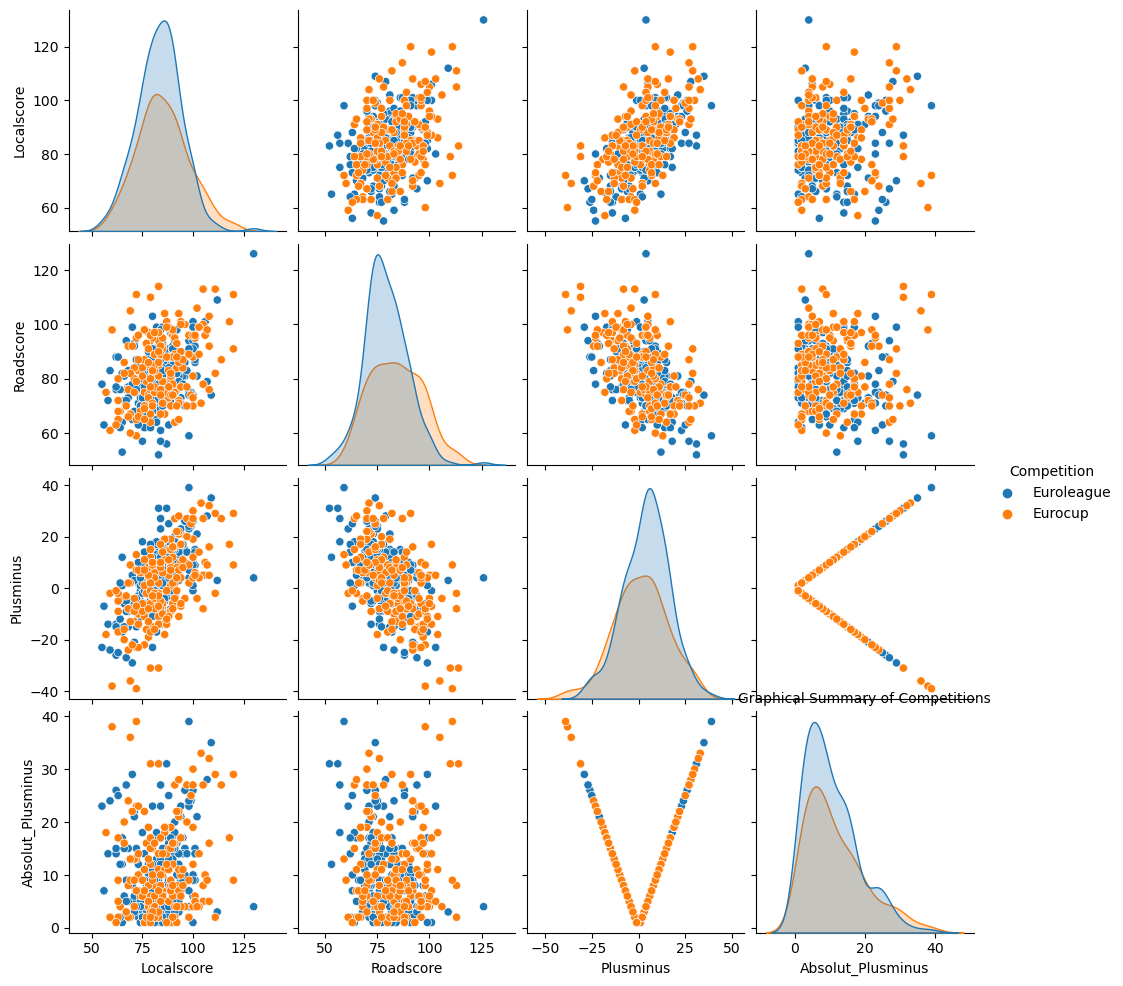

In [220]:
sns.pairplot(competition, hue="Competition")
plt.title("Graphical Summary of Competitions", size=10);
#we can see using this plot a summary of many things we have discussed in lines above

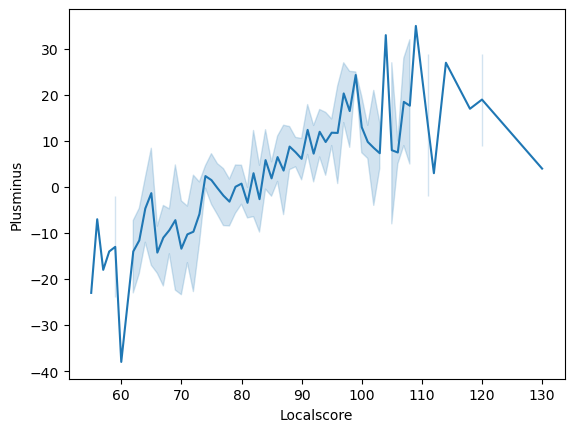

In [221]:
data = pd.melt(competition, ['Plusminus'])
sns.lineplot(x='Localscore', y="Plusminus", 
             data=competition);


**Your comments here**
- This is not exactly a trend, as trends usually are good to check the progression of variable in time. However, we see an increasing trend between the local score and the plusminus. The bigger the localscore, the bigger the plusminus.
- Again, this is not exactly a trend, but more in line with correlation. But we don't have a specific time variable in the dataset to do it.

In [222]:
## Correlation / Heatmap
competition["Comp_num"]=competition["Competition"].replace("Euroleague", 1).replace("Eurocup",0)


In [223]:
competition.sample()

,Competition,Localscore,Roadscore,Plusminus,Ganador,Absolut_Plusminus,Comp_num
340,Eurocup,75,84.0,-9.0,Visitante,9.0,0


In [224]:
competition["Ganador_num"]=competition["Ganador"].replace("Local", 1).replace("Visitante",0)

In [225]:
new=competition.drop(columns=["Competition","Ganador"], inplace=True)

In [226]:
corr=competition.corr()

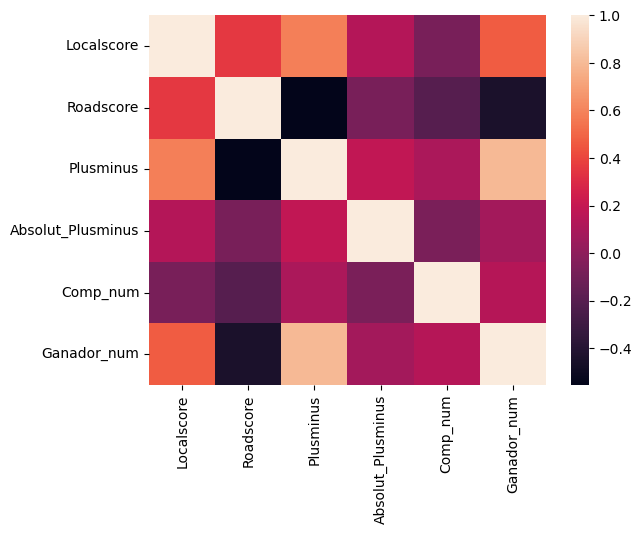

In [227]:
sns.heatmap(corr);

**Your comments here**
- Diagonal is always one, as correlation between the same variable twice is 1. The relationship of a variable with itself...is 100% always!
- There is a great correlation (bothp between "Ganador" and "Roadscore" as well as "Roadsdcore" and "Plusminus". This is because these variables are created using common values and one is directed to the other. 